In [22]:
#one way anova
data=read.table("group_data.txt",header=T)

x1=data$Group.1
x2=data$Group.2
x3=data$Group.3
x4=data$Group.4

alpha=0.05

xlis=list(x1,x2,x3,x4)

n=0

m=length(xlis)

sq_sum=0.0

sum=0.0

add_rowsum_sq=0.0

sum_sq=0.0


for(i in 1:length(xlis)) {
    
    n=n+length(xlis[[i]])
    
    add_rowsum_sq= add_rowsum_sq + (sum(xlis[[i]])^2)/length(xlis[[i]])
    
    for(j in 1:length(xlis[[i]])) {
        
        sq_sum = sq_sum + (xlis[[i]][j])^2
        
        sum = sum + xlis[[i]][j]
        
        }
}

f_critical=qf((1-alpha),m-1,n-m) 


sum_sq=(sum^2)/n

SSTO =   sq_sum -  sum_sq

SST =  add_rowsum_sq -  sum_sq 

SSE=SSTO-SST

f=(SST/m-1)/(SSE/n-m)
pval=pf(f,m-1,n-m)

print(paste("SSTO = ",SSTO))

#printing p value
print(paste("pvalue=",pval))

 

print(paste("SST = ",SST))

print(paste("SSE = ",SSE))

print(paste("F=",f))



print(paste("F_critical=",f_critical))

if (f>f_critical) {
    print(paste("null rejected at a significance level of ",alpha))
} else {
    print(paste("null accepted at a significance level of" ,alpha))
}

print(paste("degrees of freedom",(m-1),",",(n-m)))



[1] "SSTO =  1920.63468749999"
[1] "pvalue= 0.0734874366091047"
[1] "SST =  37.6884374999936"
[1] "SSE =  1882.94624999999"
[1] "F= 0.153570230427257"
[1] "F_critical= 2.94668526601727"
[1] "null accepted at a significance level of 0.05"
[1] "degrees of freedom 3 , 28"


In [34]:
#A function performing two sample Welschs test

print("Null hypotheis H0: μ1=μ2 i.e two groups of placebo and Treatment doesn't differ with respect to mean ")
print("Alternate hypotheis H0: μ1!=μ2 i.e two groups of placebo and Treatment differ with respect to mean")

two_samp_welch_test_unknown_unequal = function(x,y,alpha,alternative="two-sided"){
    n = length(x)
    m = length(y)
    xbr=mean(x)
    ybr=mean(y)
    sx=sd(x)
    sy=sd(y)
    df=((((sx*sx)/n)+((sy*sy)/m))**2)/(((1/(n-1))*(((sx*sx)/n)**2))+((1/(m-1))*(((sy*sy)/m)**2)))
    t=(xbr-ybr)/sqrt(((sx*sx)/n)+((sy*sy)/m))
    t_critical=0
    null_status=0
    pval=0
    if(alternative =="two-sided"){
        t_critical=qt(1-(alpha/2),df)
        
        if ((t_critical < t) | (t < -t_critical)){
            null_status="Rejected"
        } 
        else{null_status="Accepted"}
    }
    if(alternative == "greater"){
        t_critical= qt(1-alpha,df)
        if (t > t_critical){
            null_status="Rejected"
        }else{null_status="Accepted"}
    }
    if(alternative == "lesser"){
        t_critical = qt(1-alpha,df)
        if(t < -t_critical){
            null_status="Rejected"
        }else{null_status="Accepted"}
    }
    if(t >0){
        pval = 1-pt(t,df)
    }else if (t < 0){
        pval = pt(t,df)
    }else{pval=0}
print("two sample welch test_unequal")
print(paste("n=",n))
print(paste("m=",m))
print(paste("mean x =",xbr))
print(paste("mean x =",ybr)) 
print(paste("t=",t))    
print(paste("df=",df))
print(paste("alpha=", alpha))
print(paste("t_critical=", t_critical))
print(paste("pval=",pval))
print(paste(alternative , "hypothesis"))
print(paste("null hypothesis", null_status ))
}    

#x =c(33.38,32.15,33.99,34.1,33.97,34.34,33.95,33.85,34.23,32.73,33.46,34.13,34.45,34.19,34.05)
#x=c(10.2, 9.5, 10.1, 10.0, 9.8, 10.9, 11.4, 10.8, 9.7)
x=c(3.1,5.2,5.3,4.7,5.4,5.7,3.8,6.2,6.9,5.5,4.1,7.8)
#y=c(34.33,42,25,56,45,34,32,43,67)
#y=c(11.0, 11.2, 10.1, 11.4, 11.7, 11.2, 10.8, 11.6, 10.9)
y=c(4.9,6.9,7.1,4.9,4.5,6.1,6.4,6.2,6.3,7.4,5.4,4.4)
alpha=0.05

#call_the_function

two_samp_welch_test_unknown_unequal(x,y,alpha)



[1] "Null hypotheis H0: μ1=μ2 i.e two groups of placebo and Treatment doesn't differ with respect to mean "
[1] "Alternate hypotheis H0: μ1!=μ2 i.e two groups of placebo and Treatment differ with respect to mean"
[1] "two sample welch test_unequal"
[1] "n= 12"
[1] "m= 12"
[1] "mean x = 5.30833333333333"
[1] "mean x = 5.875"
[1] "t= -1.18057755287837"
[1] "df= 20.8790218144827"
[1] "alpha= 0.05"
[1] "t_critical= 2.08034779898197"
[1] "pval= 0.125522883265845"
[1] "two-sided hypothesis"
[1] "null hypothesis Accepted"


In [32]:
t

function (x) 
UseMethod("t")
<bytecode: 0x56097ae6eca8>
<environment: namespace:base>

In [28]:
#A function performing two sample Welschs test
 
print("Null hypotheis H0: μ1=μ2 i.e two groups of placebo and Treatment doesn't differ with respect to mean ")
print("Alternate hypotheis H0: μ1!=μ2 i.e two groups of placebo and Treatment differ with respect to mean")

two_sample_w_test<-function(X,Y,alpha,alternative)
{
	if(!alternative %in% c("two_sided","lesser","greater"))
	{
		print("Input Error: Alternative can only be two_sided,lesser or greater")
		on.exit()
	}
	else
	{
		x_bar=mean(X)
		y_bar=mean(Y)
		sx=sd(X)
		sy=sd(Y)
		n=length(X)
		m=length(Y)
		df=((sx^2/n)+(sy^2/m))^2/(((1/(n-1))*(sx^2/n)^2)+((1/(m-1))*(sy^2/m)^2))
		w=(x_bar-y_bar)/(sqrt((sx^2/n)+(sy^2/m)))
		pvalue=0
		if(w<0)
		{
			pvalue=pt(w,df)
		}
		else if(w==0)
		{
			pvalue=0.5
		}
		else
		{
			pvalue=1-pt(w,df)
		}
		#hypothesis testing
		if(alternative=="two_sided")
		{
			w_alpha=qt(1-(alpha/2),df)
			if((w>w_alpha)|(w<(-w_alpha)))
			{
				print("Null hypothesis is rejected")
				print("Two sided alternative hypothesis is accepted")
				print("Population means of the two samples are not equal")
				
			}
			else
			{
				print("Null hypothesis is accepted")
				print("Two sided alternative hypothesis is rejected")
				print("Population means of the two samples are  equal")
			}
		}
		else if(alternative=="lesser")
		{
			w_alpha=qt(1-alpha,df)
			w_alpha=-w_alpha
			if(w<w_alpha)
			{
				print("Null hypothesis is rejected")
				print("Alternative hypothesis is accepted")
				print("Population mean of X is lesser than that of Y")
			}
			else
			{
				print("Null hypothesis is accepted")
				print("Two sided alternative hypothesis is rejected")
				print("Population means of the two samples are  equal or population mean of X is greater than that of Y")
			}
		}
		else if(alternative=="greater")
		{
			w_alpha=qt(1-alpha,df)
			if(w>w_alpha)
			{
				print("Null hypothesis is rejected")
				print("Alternative hypothesis is accepted")
				print("Population mean of X is greater than that of Y")
			}
			else
			{
				print("Null hypothesis is accepted")
				print("Two sided alternative hypothesis is rejected")
				print("Population means of the two samples are  equal or population mean of X is lesser than that of Y")
			}
		}
			print(paste("alpha =",alpha))
			print(paste("p value =",pvalue))
			print(paste("Sample size of X =",n))
			print(paste("Sample size of Y =",m))
			print(paste("w =",w))
			print(paste("w_alpha =",w_alpha))
			print(paste("mean of X =",x_bar))
			print(paste("mean of Y =",y_bar))
			print(paste("SD of X =",sx))
			print(paste("SD of Y =",sy))
			print(paste("Degree of freedom =",df))
	}
}

#call
x=c(3.1,5.2,5.3,4.7,5.4,5.7,3.8,6.2,6.9,5.5,4.1,7.8)
y=c(4.9,6.9,7.1,4.9,4.5,6.1,6.4,6.2,6.3,7.4,5.4,4.4)
alpha=0.05
two_sample_w_test(x,y,alpha,"two_sided")


[1] "Null hypotheis H0: μ1=μ2 i.e two groups of placebo and Treatment doesn't differ with respect to mean "
[1] "Alternate hypotheis H0: μ1!=μ2 i.e two groups of placebo and Treatment differ with respect to mean"
[1] "Null hypothesis is accepted"
[1] "Two sided alternative hypothesis is rejected"
[1] "Population means of the two samples are  equal"
[1] "alpha = 0.05"
[1] "p value = 0.125522883265845"
[1] "Sample size of X = 12"
[1] "Sample size of Y = 12"
[1] "w = -1.18057755287837"
[1] "w_alpha = 2.08034779898197"
[1] "mean of X = 5.30833333333333"
[1] "mean of Y = 5.875"
[1] "SD of X = 1.30485689451047"
[1] "SD of Y = 1.03055589588603"
[1] "Degree of freedom = 20.8790218144827"


In [95]:
print("Null hypotheis H0: μ1=μ2 i.e two groups of placebo and Treatment doesn't differ with respect to mean ")
print("Alternate hypotheis H0: μ1!=μ2 i.e two groups of placebo and Treatment differ with respect to mean")

two_samp_t_test = function(x,y,alpha,alternative="two-sided"){
    n = length(x)
    m = length(y)
    df= n+m-2
    xbr=mean(x)
    ybr=mean(y)
    sx=sd(x)
    sy=sd(y)
    sp=sqrt((((n-1)*(sx*sx))+((m-1)*(sy*sy)))/(m+n-2))
    t=(xbr-ybr)/(sp*sqrt((1/m)+(1/n)))
    t_critical=0
    null_status=""
    pval=0
    if(alternative =="two-sided"){
        t_critical=qt(1-(alpha/2),df)
        #if((w>w_alpha)|(w<(-w_alpha)))
        #) | ( ))
        if( (t> t_critical)|(t < (-t_critical))  ){
            null_status="Rejected"
        } 
        else{null_status="Accepted"}
    }
    if(alternative == "greater"){
        t_critical= qt(1-alpha,df)
        if (t > t_critical){
            null_status="Rejected"
        }else{null_status="Accepted"}
    }
    if(alternative == "lesser"){
        t_critical = qt(1-alpha,df)
        if(t < (-t_critical)){
            null_status="Rejected"
        }else{null_status="Accepted"}
    }
    if(t >0){
        pval = 1-pt(t,df)
    }else if (t < 0){
        pval = pt(t,df)
    }else{pval=0}
print("two sample t test")
print(paste("n=",n))
print(paste("m=",m))
print(paste("mean x =",xbr))
print(paste("mean y =",ybr)) 
print(paste("t=",t))    
print(paste("df=",df))
print(paste("alpha=", alpha))
print(paste("t_critical=", t_critical))
print(paste("pval=",pval))
print(paste(alternative , "hypothesis"))
print(paste("null hypothesis", null_status ))
}    

x=c(3.1,5.2,5.3,4.7,5.4,5.7,3.8,6.2,6.9,5.5,4.1,7.8)

#y=c(34.33,42,25,56,45,34,32,43,67)
y=c(4.9,6.9,7.1,4.9,4.5,6.1,6.4,6.2,6.3,7.4,5.4,4.4)
alpha=0.05
two_samp_t_test(x,y,alpha,alternative="two-sided")

[1] "Null hypotheis H0: μ1=μ2 i.e two groups of placebo and Treatment doesn't differ with respect to mean "
[1] "Alternate hypotheis H0: μ1!=μ2 i.e two groups of placebo and Treatment differ with respect to mean"
[1] "two sample t test"
[1] "n= 12"
[1] "m= 12"
[1] "mean x = 5.30833333333333"
[1] "mean y = 5.875"
[1] "t= -1.18057755287837"
[1] "df= 22"
[1] "alpha= 0.05"
[1] "t_critical= 2.07387306790403"
[1] "pval= 0.125188897088577"
[1] "two-sided hypothesis"
[1] "null hypothesis Accepted"


In [41]:
#(a) Read the given data into a data frame called ”indat”.
indat=read.table("crop_table.txt",header=TRUE)


[1] "Year"      "Rice"      "Wheat"     "Cereals"   "Pulses"    "Grains"   
 [7] "OilSeeds"  "Sugarcane" "Cotton"    "Jute"      "Total"

In [42]:
#(b) Create a column consisting of the sum of cultivation areas of Rice, wheat and Cereals over the years.
indat$sum_of_cultivation_areas_of_Rice_wheat_and_Cereals_over_the_years=indat$Rice + indat$Wheat + indat$Cereals

In [43]:
indat

Year    Rice  Wheat Cereals Pulses Grains OilSeeds Sugarcane Cotton Jute
1  1950-51 14.43  4.57 17.64   8.94   45.58  5.03     0.80      2.75   0.27
2  1960-61 13.34  5.05 17.57   9.21   45.17  5.38     0.95      2.97   0.35
3  1970-71 13.59  6.59 16.61   8.15   44.95  6.02     0.95      2.75   0.39
4  1980-81 14.20  7.88 14.78   7.94   44.80  6.23     0.94      2.77   0.46
5  1990-91 14.62  8.28 12.44   8.45   43.78  8.27     1.26      2.55   0.35
6  2000-01 16.04  9.23 10.86   7.30   43.43  8.17     1.55      3.06   0.37
7  2007-08 15.13  9.66  9.81   8.14   42.75  9.20     1.74      3.24   0.33
8  2008-09 15.82  9.64  9.53   7.67   42.66  9.57     1.53      3.27   0.31
9  2009-10 14.77 10.03  9.75   8.20   42.75  9.15     1.47      3.57   0.32
10 2010-11 14.40  9.77  9.52   8.87   42.57  9.15     1.64      3.78   0.29
11 2011-12 14.97 10.16  8.99   8.32   42.44  8.95     1.71      4.14   0.31
12 2012-13 14.89 10.41  8.65   8.24   42.20  9.32     1.78      4.21   0.30
   Total sum_of_cultivation_areas_of_Rice_wheat_and_Cereals_over_the_years
1  100   36.64                                                            
2  100   35.96                                                            
3  100   36.79                                                            
4  100   36.86                                                            
5  100   35.34                                                            
6  100   36.13                                                            
7  100   34.60                                                            
8  100   34.99                                                            
9  100   34.55                                                            
10 100   33.69                                                            
11 100   34.12                                                            
12 100   33.95

In [47]:
#(c) Create a subset of data in which cereals were cultivated in more than 10 percent of total area and print this sunset.
subdata <- subset(indat, indat$Cereals > 10.0) 
print(subdata)

     Year  Rice Wheat Cereals Pulses Grains OilSeeds Sugarcane Cotton Jute
1 1950-51 14.43  4.57   17.64   8.94  45.58     5.03      0.80   2.75 0.27
2 1960-61 13.34  5.05   17.57   9.21  45.17     5.38      0.95   2.97 0.35
3 1970-71 13.59  6.59   16.61   8.15  44.95     6.02      0.95   2.75 0.39
4 1980-81 14.20  7.88   14.78   7.94  44.80     6.23      0.94   2.77 0.46
5 1990-91 14.62  8.28   12.44   8.45  43.78     8.27      1.26   2.55 0.35
6 2000-01 16.04  9.23   10.86   7.30  43.43     8.17      1.55   3.06 0.37
  Total sum_of_cultivation_areas_of_Rice_wheat_and_Cereals_over_the_years
1   100                                                             36.64
2   100                                                             35.96
3   100                                                             36.79
4   100                                                             36.86
5   100                                                             35.34
6   100                        

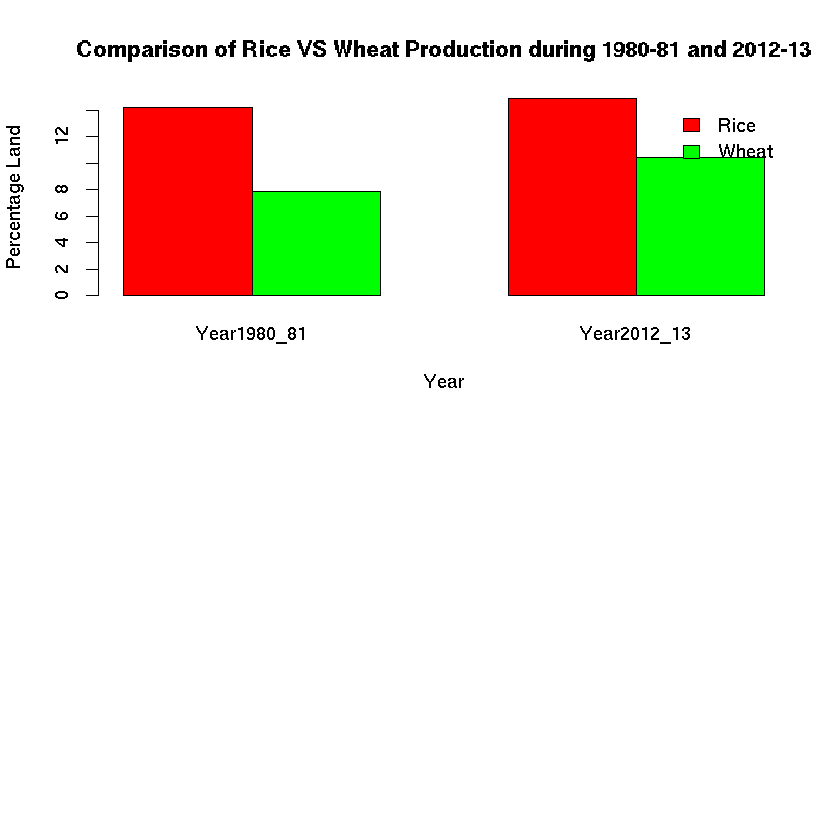

In [99]:

#Read the given data file ”crop table.txt” into a data frame called ”mydata”.

mydata=read.table("crop_table.txt",header=TRUE)

#(a) Create a bar plot comparing the cultivation area of rice and wheat during 1980-81 and 2012-13. Label the entities properly.

Year1980_81=c(mydata$Rice[4],mydata$Wheat[4])

Year2012_13= c(mydata$Rice[12],mydata$Wheat[12])

dat=data.frame(Year1980_81,Year2012_13)
par(mfrow=c(2,1))

barplot(height=as.matrix(dat),main="Comparison of Rice VS Wheat Production during 1980-81 and 2012-13",ylab="Percentage Land",xlab="Year",beside=TRUE, col= c("red","green"))
legend("topright",
       c("Rice","Wheat"), cex=1.0,
       bty="n",
       fill=c("red","green"))

#(b) Create a Pie-chart depicting the percentage of cultivation areas of all the crops. Write the legends properly.

Year1990_91=as.numeric(mydata[5,2:10])
lab=colnames(mydata)[2:10]

#print("the percentage of cultivation areas of all the crops 1900-91",Year1990_91)
#Year1990_91
#pie(Year1990_91,main="the percentage of cultivation areas of all the crops 1900-91",col=rainbow(10),labels=paste(Year1990_91,"%"),cex=0.8)
#legend("topright",lab, fill=rainbow(10))


[1] 14.62  8.28 12.44  8.45 43.78  8.27  1.26  2.55  0.35

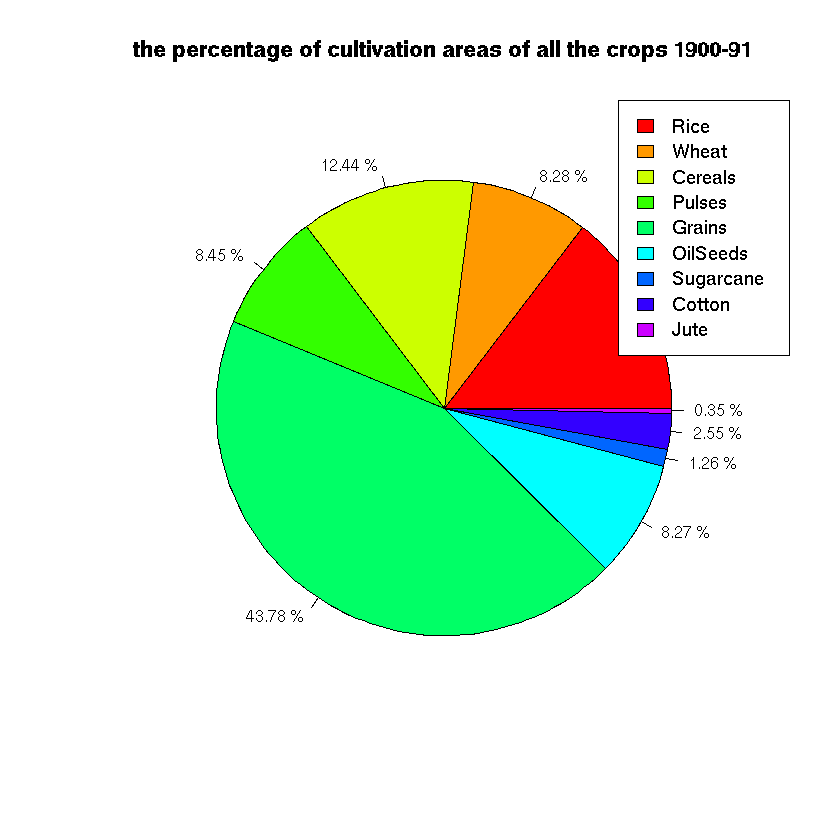

In [80]:


Year1990_91=as.numeric(mydata[5,2:10])
lab=colnames(mydata)[2:10]
#print("the percentage of cultivation areas of all the crops 1900-91",Year1990_91)
Year1990_91
pie(Year1990_91,main="the percentage of cultivation areas of all the crops 1900-91",col=rainbow(10),labels=paste(Year1990_91,"%"),cex=0.8)
legend("topright",lab, fill=rainbow(10))


In [ ]:
#(a) Create a bar plot comparing the cultivation area of rice and wheat during 1980-81 and 2012-13. Label the entities properly.
d=data2[c(4:12),c(2:3)]
print(d)
# barplot with colors. Make sure that the plot and legends have same colors for items.
barplot(height=as.matrix(d), main="comparing the cultivation area of rice and wheat during 1980-81 and 2012-13", ylab="cultivation area", beside=TRUE,
                                                            col=rainbow(9))

#Add legends
legend("topright", c("1980-81","1990-91","2000-01","2007-08","2008-09","2009-10","2010-11","2011-12","2012-13"), cex=0.7, bty="n",
                                                             fill=rainbow(9))
#(b) Create a Pie-chart depicting the percentage of cultivation areas of all the crops. Write the legends properl
data4=data2[c(0:1),c(2:10)]
print(data4)


# create data
result <- as.numeric(data4)
alabels <- paste(result, "%", sep="")
pie(result, main="the percentage of cultivation areas of all the crops 1950-51", col=rainbow(9), labels=alabels, cex=0.8)

# draw the legend
legend(-1.2, 1.0, c("Rice","Wheat","Cereals","Pulses","Grains","OilSeeds","Sugarcane","Cotton","Jute"), fill=rainbow(9))



In [ ]:
# a
#(a) Plot a Poisson distribution with a mean 5 in the range 0 to 12. The title of the plot should be ”Poisson distribution : mean = 5”.
x=seq(0,12);
gy=dpois(x,5);
dev.off()
plot(x,gy,type ="o",asp=50,main =)

# b
mu=6
S=1.6
rand = rnorm(10000,mu,S)
hist(rand,breaks = 80,col=rainbow(10))

# c

s=subset(rand,(rand>mu+(2*S)) | (rand<mu(-2*S))
n=length(s)

n

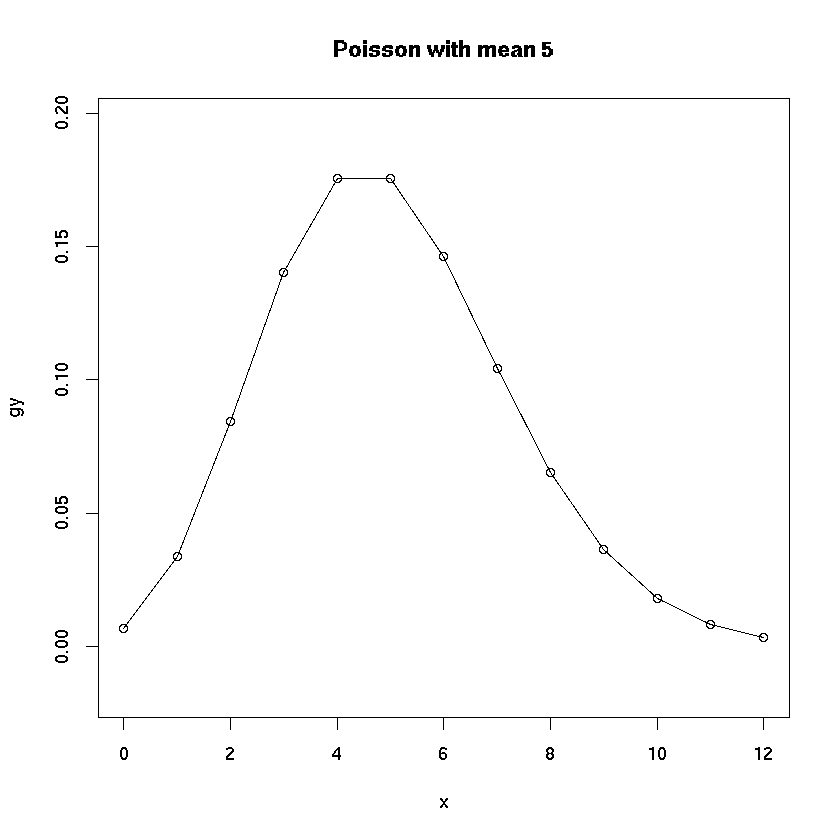

In [86]:
x=seq(0,12);
gy=dpois(x,5);
#dev.off()
plot(x,gy,type ="o",asp=50,main = "Poisson with mean 5")


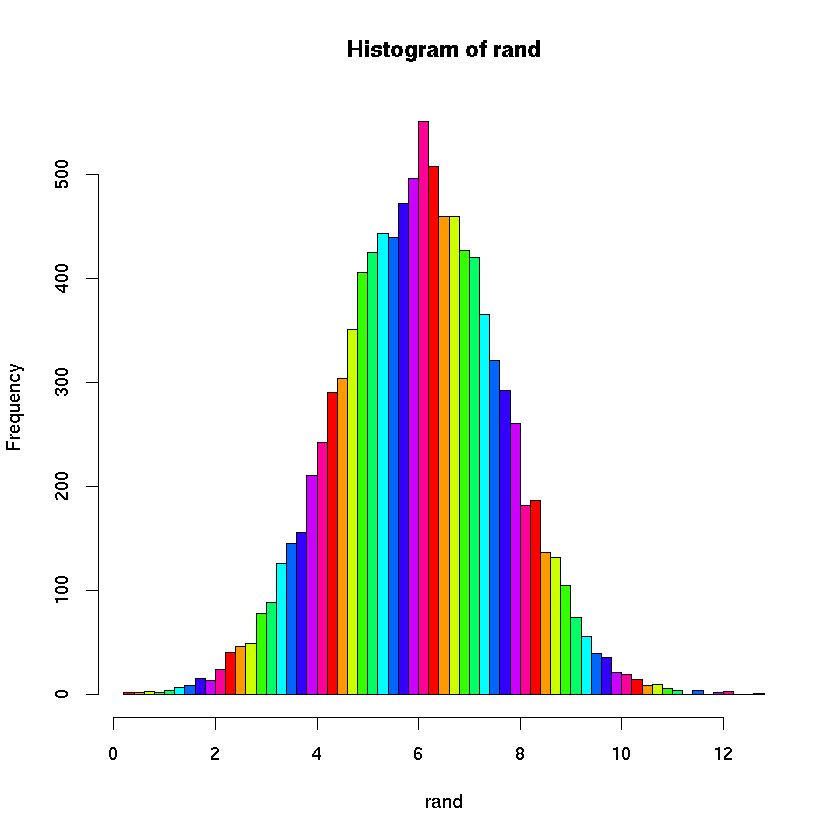

In [87]:
mu=6
S=1.6
rand = rnorm(10000,mu,S)
hist(rand,breaks = 80,col=rainbow(10))

In [88]:
s=subset(rand,(rand>mu+(2*S)) | (rand<mu(-2*S))
n=length(s)
n

ERROR: Error in parse(text = x, srcfile = src): <text>:2:1: unexpected symbol
1: s=subset(rand,(rand>mu+(2*S)) | (rand<mu(-2*S))
2: n
   ^


In [89]:
s=subset(rand,(rand>mu+2*S) | (rand<mu-2*S))
n=length(s)
n

[1] 445

In [90]:
s

[1]  2.4622628  1.4080954  0.3525933  2.3694977 11.9402656  2.5020042
  [7] 10.6033170  1.3921410  9.5557159  2.3642581  2.1010132  9.6206045
 [13]  2.2242030  9.5250035  1.8962171 12.6211082  9.4260734  1.7506091
 [19]  9.9097346  9.4728004  2.6536925  2.1195444  9.2036308  2.3608241
 [25] 10.2739353  1.0870083  2.5943608 11.5452458  1.2033128  9.6582476
 [31]  2.7762190  2.5588049  2.5702314  9.9959930  2.5235970  2.6451893
 [37]  2.4320125  2.5568565  9.4963248  9.5935574  2.3996747  1.6390283
 [43]  9.5475142 10.1254560  1.4338097  0.8569959 10.4216776  1.7446047
 [49]  1.9159210  1.8763775  2.4800129  2.5517668 11.9495757 10.0326649
 [55]  9.2278338  9.4509076  9.7379329  9.7685078 10.1671228  9.6747493
 [61]  2.7649962  2.6246072  9.2569537  9.6515925  9.8048412  9.8196790
 [67]  9.2311504  0.6181459  1.6288015  9.6479999  1.3735379  2.0808310
 [73]  2.6162417  9.3758142  9.8816556  1.9464247  9.7153419 10.1797897
 [79] 10.0962327  1.9324788 10.5416485 10.0777207  9.3233802  2.0257917
 [85] 12.1047051  2.0459461  2.7813582 10.5044147  2.2788837  2.0893744
 [91] 10.4013047  9.2278853  1.3032741  9.7163338  9.8966809  9.3691025
 [97]  1.2931593  2.6039692  1.7681278  9.2793199  9.3134456  9.3053442
[103]  2.4094769  2.2606657  2.2938104  1.5259171  1.9613463  2.6153143
[109]  2.5488552  2.1083516  9.2877110  9.5988712  9.4626062  2.3246125
[115]  9.2999898  9.4710490  2.3127567 10.0418481  9.5967251  2.1515130
[121]  9.6229775 10.8859357  9.8479945  2.7026523  9.8427916 10.7924608
[127]  2.7035207  2.7846288  2.7823905  9.6834705  2.5908892  1.9851135
[133]  9.7740806 10.7848969  2.1843014  2.4672492  2.7531198  0.3033207
[139]  9.6002009 10.2393681  2.7980376  9.3137455  2.3731158  2.2144587
[145]  2.1480007 12.0093731  9.2208141  9.6301652  9.6816664  2.3625474
[151] 10.4231224  9.8535277 10.2494526  9.6000692  2.6293469  9.3858296
[157] 10.0923925  9.6218336  1.5084339  2.7488444 11.1732727  2.7052018
[163] 10.8789884  2.4901939  9.5279001  2.5637402  2.3645751  2.5107908
[169]  2.4370081 10.6833490  9.2104176 10.6740774 10.1818487 10.4662236
[175]  2.4365803 10.5295015  2.0233770  2.4873664  2.4270973  2.0496051
[181]  9.2440122  9.4907628  2.5636462  9.9465303 10.3541589  2.5348507
[187]  2.4239562  2.5341513 10.0694661  2.0774772 10.2609876  2.7723516
[193]  9.2321274  2.6262690  2.3757102  9.3593275  9.3484637  9.7414862
[199]  2.0502767  9.5020841  2.2679937 10.2797303 10.2119464  2.3465745
[205]  1.8388142  9.3408739  9.8972766  9.9151367 10.3002297  9.5121428
[211] 10.3584778  9.6608618  1.3108137  2.3194137  9.4011730  0.4571532
[217]  9.3394164  2.5386705  9.6196877  2.5321748  9.3594493  0.6926525
[223] 10.7956063  2.4853574  2.7902898 10.0791388 11.0749787  9.4633914
[229]  2.6479143 11.0392627 10.3608996  9.6364570 10.6649519  2.6698145
[235]  2.4735909 10.6351098 10.5228307  9.6705521  9.4787457  1.5278952
[241]  2.3683521  9.8386649  2.4223117  2.7716969  9.2660436  2.1563272
[247]  9.3599851 10.9945297  9.5400060  1.6596370  1.7412809  2.4977960
[253]  2.6396558  9.3826352  2.3373425 11.0485854  9.4187324  9.3350998
[259]  9.5879226 10.2763174  2.7464639  2.5055585  9.4833759 10.8805308
[265]  9.9564155  9.7637410  2.6112549  1.8601616  2.6934980  9.6838668
[271]  2.3998662  2.0268190 10.0972252  2.7093681  0.9424238  2.7224055
[277] 10.3327033  9.2794437 11.5478552  1.3121875  9.7153327  9.3047047
[283]  9.2081975  2.4415602 11.5054530  9.2354565  2.2748885  2.3120479
[289]  2.0736939  9.5635753  1.7999529 10.7044578  9.2050106  9.4363896
[295]  9.6380283  9.6896017  1.6308139 11.4882960  1.1933885  9.3891465
[301]  9.4898477  0.6994084 10.8439865  2.0413743  9.3188837  1.6292461
[307]  9.5532791  1.6682229  2.5104931  2.4264251  2.2986140 10.2091816
[313]  9.8153120  9.3901412  9.5128062  2.4390153  2.2993933  9.7480800
[319]  2.3605065  2.7340404  2.5973698  1.4537206  9.4590447  2.7236228
[325]  9.2413120  2.7289026  9.4866176  9.9089772  1.9790765  1.4415434
[331]  2.3406597  9.3762389  2.1840889  9.

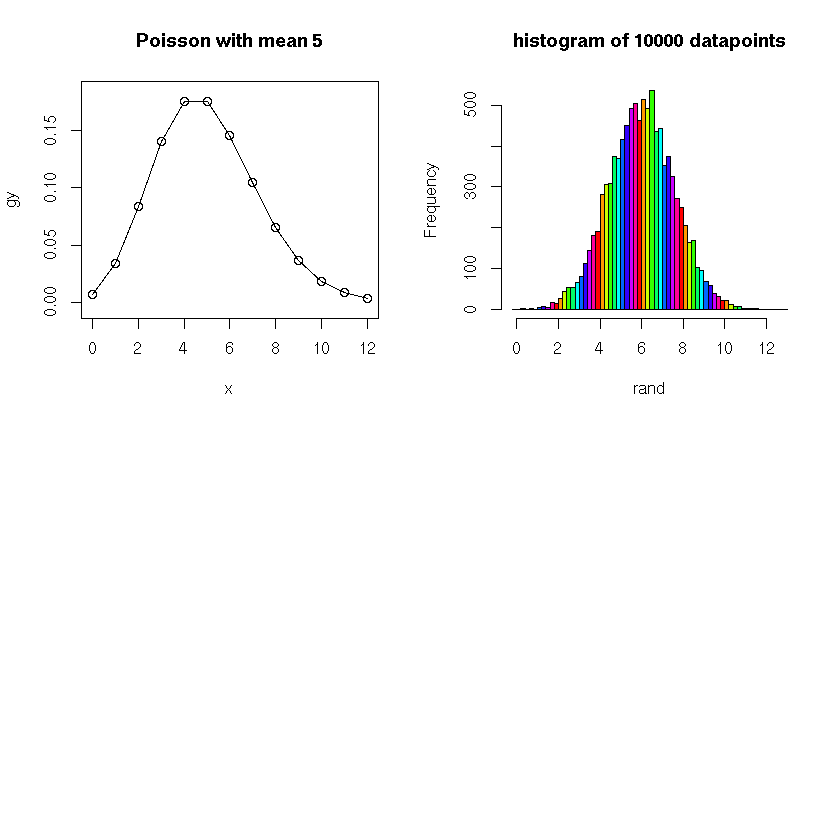

In [102]:
#(a) Plot a Poisson distribution with a mean 5 in the range 0 to 12. The title of the plot should be ”Poisson distribution : mean = 5”.
par(mfrow=c(2,2))
x=seq(0,12);
gy=dpois(x,5);
#dev.off()
plot(x,gy,type ="o",asp=50,main = "Poisson with mean 5")

#(b) Generate 10000 points randomly drawn from a Gaussian distribution whose mean is 6.0 and standard deviation is 1.6. Plot the histogram of these data points


mu=6
S=1.6
rand = rnorm(10000,mu,S)
hist(rand,breaks = 80,col=rainbow(10),main="histogram of 10000 datapoints")



In [94]:
s=subset(rand,(rand>mu+2*S) | (rand<mu-2*S))
n=length(s)

print("the number of data points more than 2 standard deviations above the mean value is = ")

print(n)

[1] "the number of data points more than 2 standard deviations above the mean value is"
[1] 417
